## Prediction of Signal Strength of an equipment using classification and regression in Neural network

In [529]:
#Import libraries and data
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif,SelectFromModel
from sklearn.linear_model import Lasso,LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import  EarlyStopping 
import pickle
import math
import tkinter as tk

In [274]:
signal_strength_df = pd.read_csv('Signal.csv')
    

In [275]:
#first 5 records
signal_strength_df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [276]:
#Datatypes of columns
signal_strength_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [277]:
#Shape of dataframe
signal_strength_df.shape

(1599, 12)

In [278]:

#5 point summary
signal_strength_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [279]:
#Range of parameters
signal_strength_df.max()-signal_strength_df.min()

Parameter 1         11.30000
Parameter 2          1.46000
Parameter 3          1.00000
Parameter 4         14.60000
Parameter 5          0.59900
Parameter 6         71.00000
Parameter 7        283.00000
Parameter 8          0.01362
Parameter 9          1.27000
Parameter 10         1.67000
Parameter 11         6.50000
Signal_Strength      5.00000
dtype: float64

In [280]:
#Check for null values
signal_strength_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [281]:
#Dropping the duplicates
signal_strength_df.drop_duplicates(inplace=True)

In [282]:
signal_strength_df.shape

(1359, 12)

In [283]:
#variance of each column
signal_strength_df.var()

Parameter 1           3.017134
Parameter 2           0.033500
Parameter 3           0.038235
Parameter 4           1.828752
Parameter 5           0.002438
Parameter 6         109.145456
Parameter 7        1116.157653
Parameter 8           0.000003
Parameter 9           0.024036
Parameter 10          0.029127
Parameter 11          1.170866
Signal_Strength       0.678281
dtype: float64

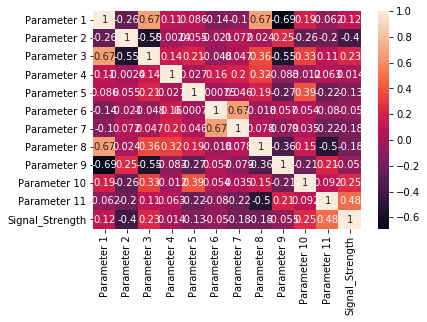

In [284]:
sns.heatmap(signal_strength_df.corr(),annot=True)

In [285]:
signal_strength_df.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
Parameter 2,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
Parameter 3,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
Parameter 4,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
Parameter 5,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
Parameter 6,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
Parameter 7,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
Parameter 8,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
Parameter 9,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
Parameter 10,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4C3C90508>,
      dtype=object)

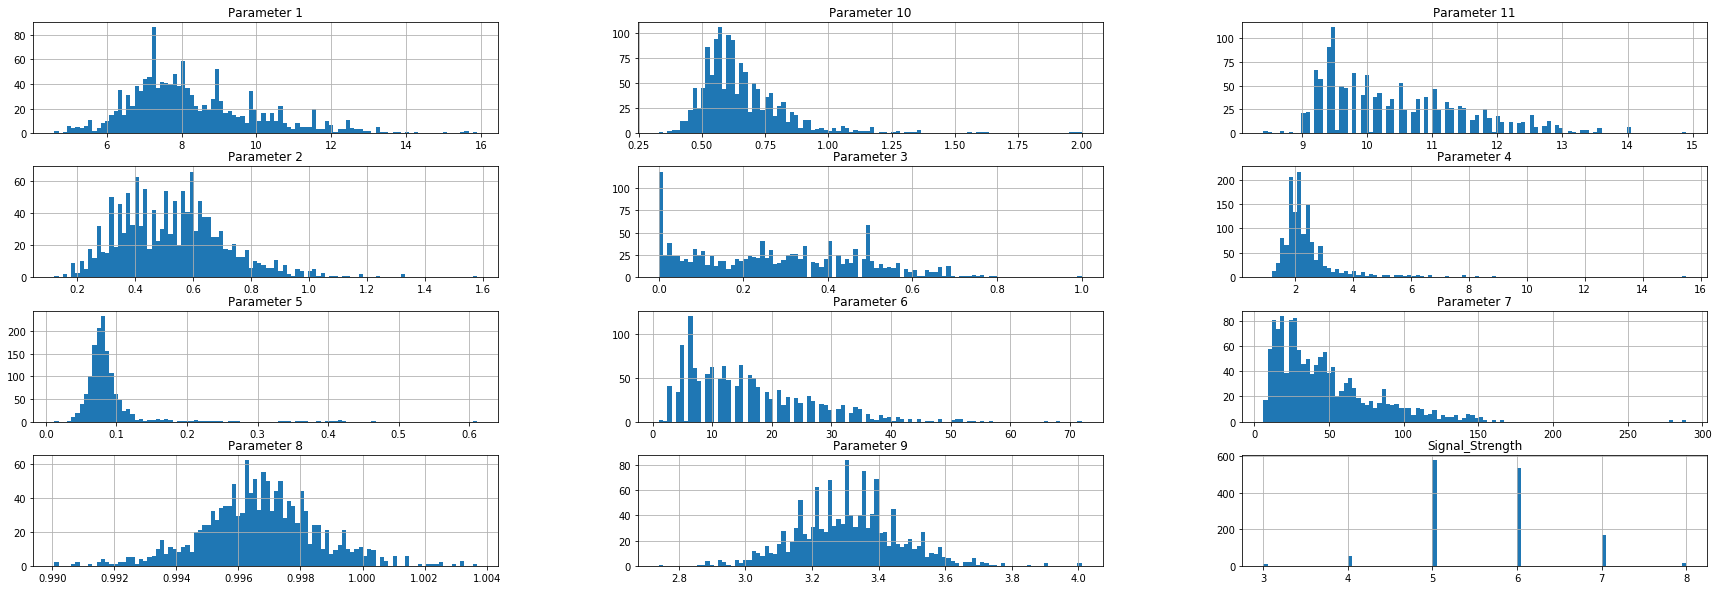

In [286]:
#Univariate analysis
#Distribution of each column
signal_strength_df.hist(bins=100, figsize=(30,10))

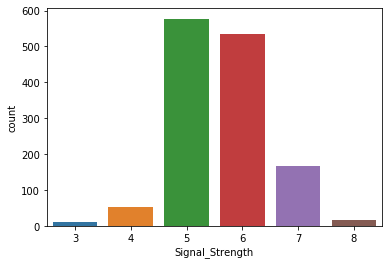

In [287]:
#Count of classes in target column
sns.countplot(signal_strength_df['Signal_Strength'])

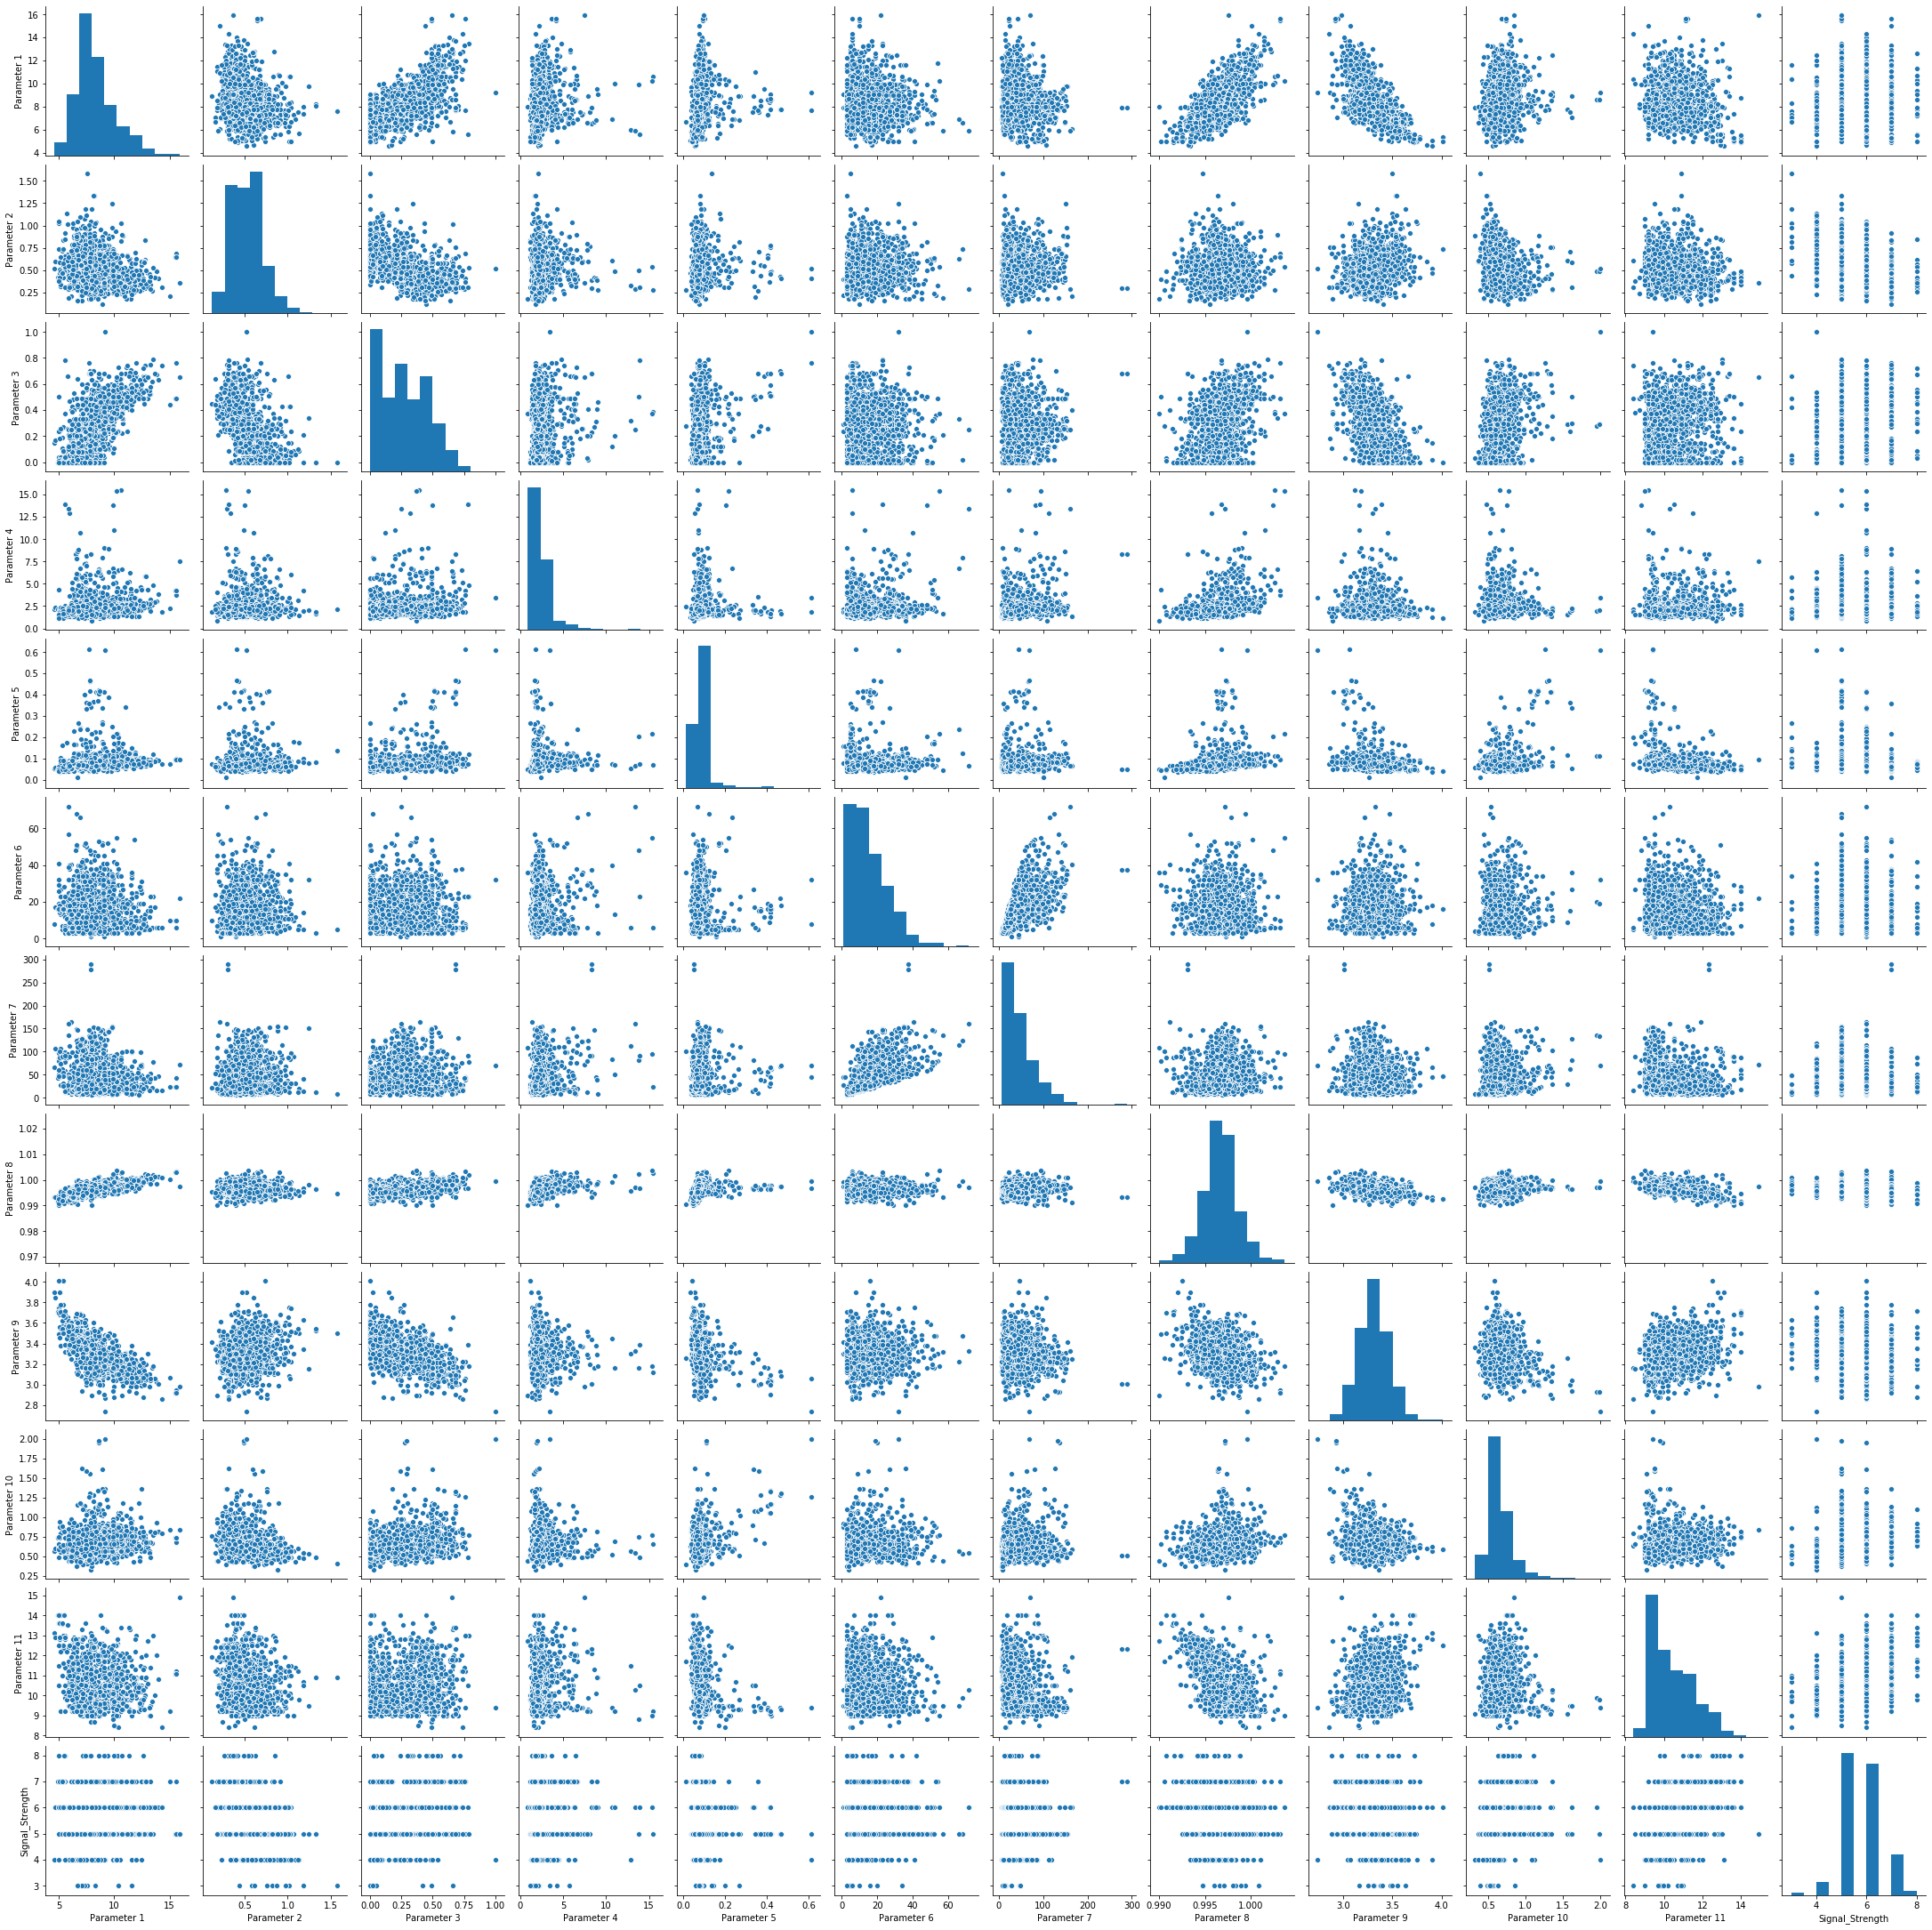

In [288]:
sns.pairplot(signal_strength_df)

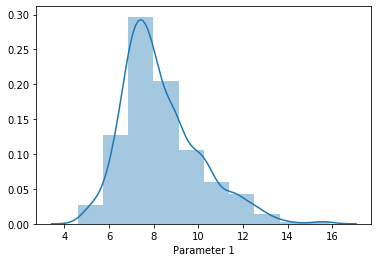

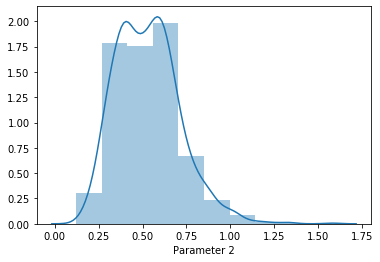

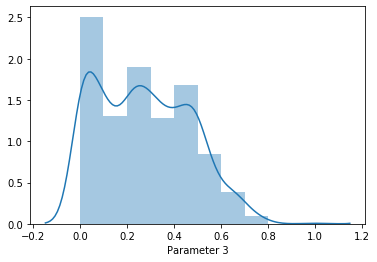

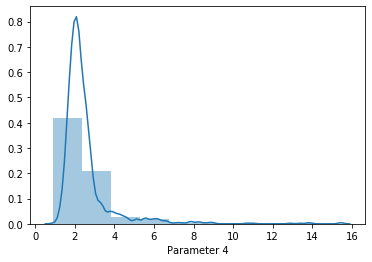

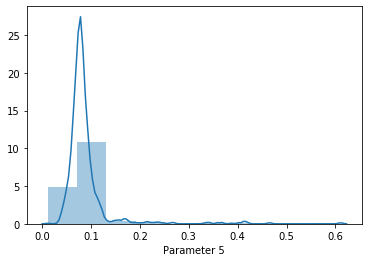

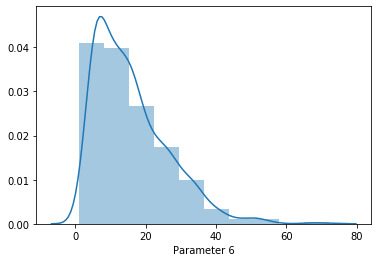

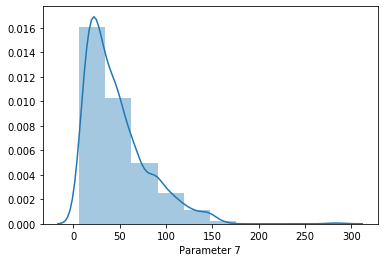

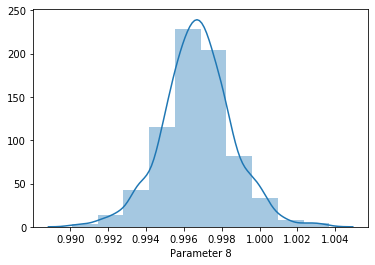

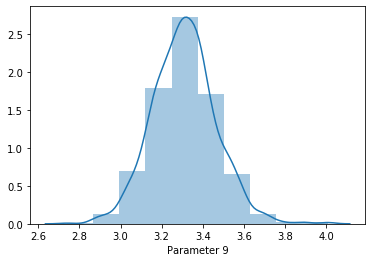

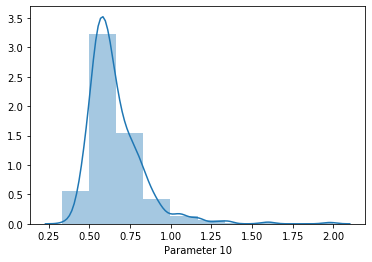

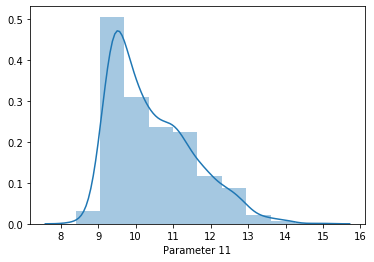

In [289]:
for i in signal_strength_df.columns[:-1]:
    sns.distplot(signal_strength_df[i], kde=True,bins=10 )
    plt.show()

In [290]:
#Outlier detection

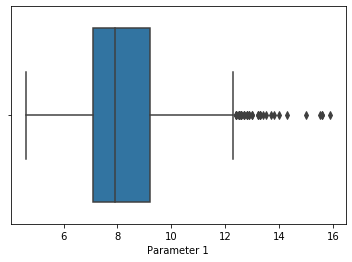

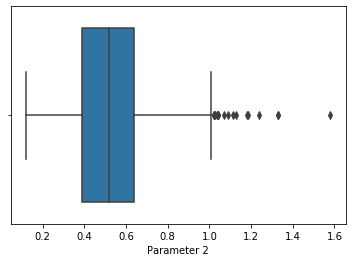

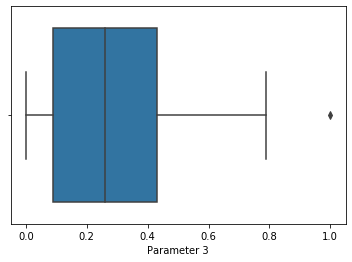

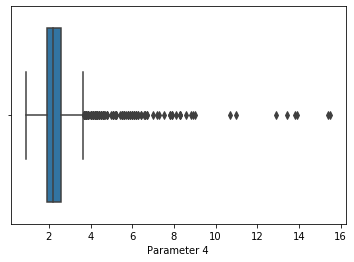

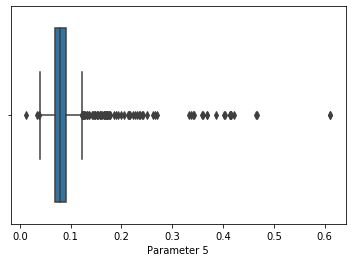

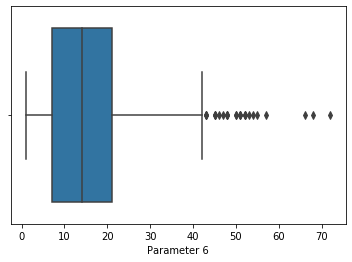

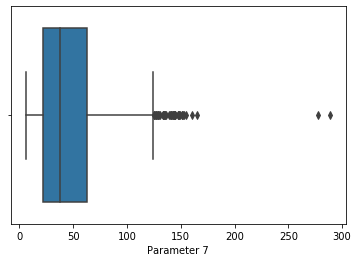

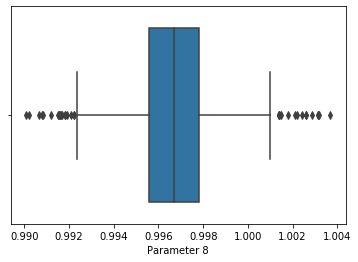

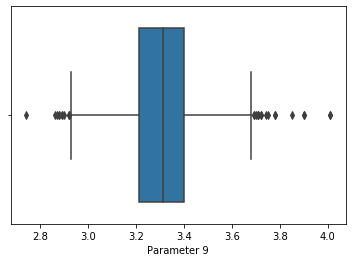

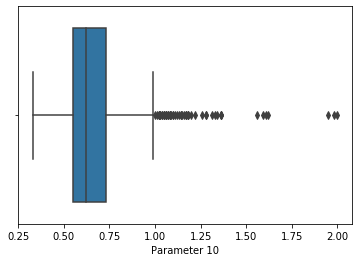

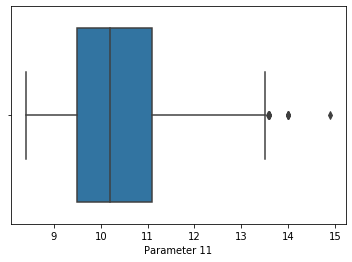

In [291]:
for i in signal_strength_df.columns[:-1]:
      sns.boxplot(signal_strength_df[i])
      plt.show()

In [292]:
signal_strength_copy = signal_strength_df.copy()

In [478]:
#Outlier treatment

from scipy import stats
import numpy as np


Q1=signal_strength_df.quantile(0.25)
Q3=signal_strength_df.quantile(0.75)
IQR=Q3-Q1
whisker_min = Q1-1.5*Q1
whisker_max=Q3+1.5*Q3
#Get the zscore for all parameters in the dataset
z = np.abs(stats.zscore(signal_strength_copy))

for i, j in zip(np.where(z > 3)[0], np.where(z > 3)[1]):# iterate using 2 variables.i for rows and j for columns
    signal_strength_copy.iloc[i,j] = signal_strength_copy.iloc[:,j].median()
 

In [479]:
signal_skew = signal_strength_copy.skew()
signal_skew_col=signal_skew.index[signal_skew>1]
signal_skew_col

Index([], dtype='object')

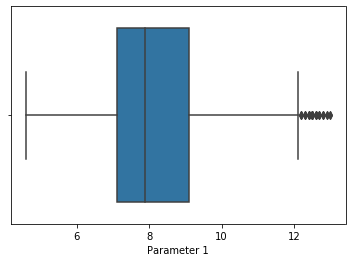

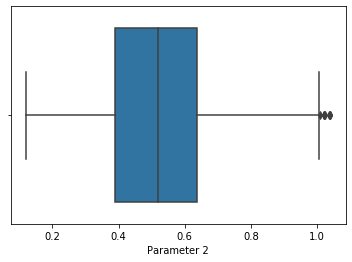

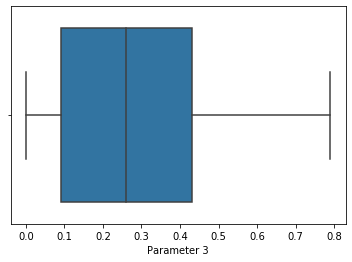

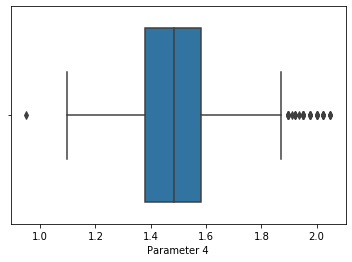

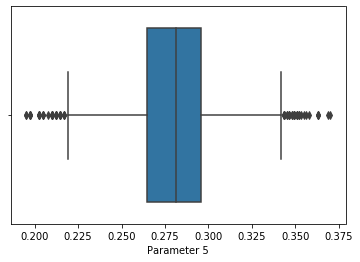

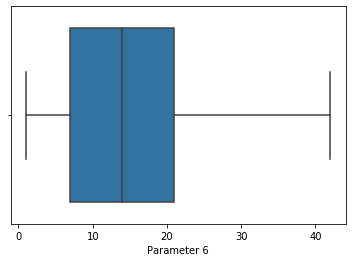

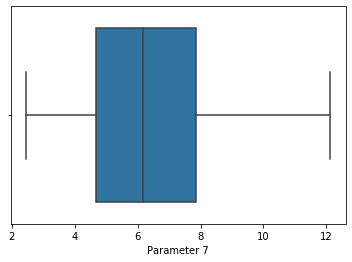

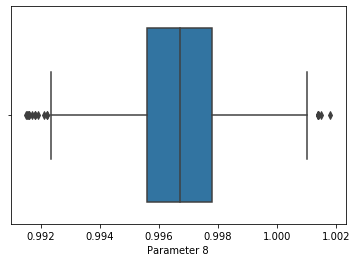

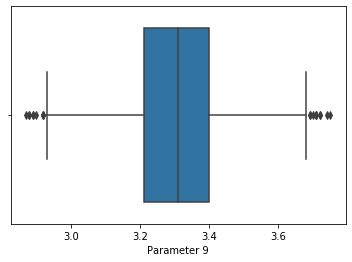

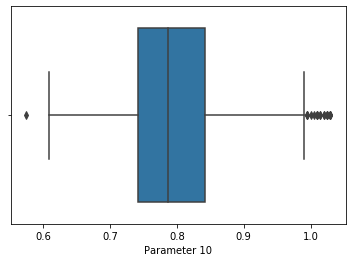

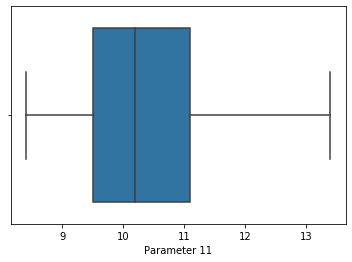

In [342]:
#Check for outliers after processing
for i in signal_strength_copy.columns[:-1]:
  sns.boxplot(signal_strength_copy[i])
  plt.show()

In [296]:
signal_strength_copy[signal_skew_col]=np.sqrt(signal_strength_copy[signal_skew_col])

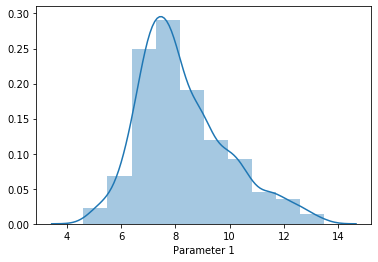

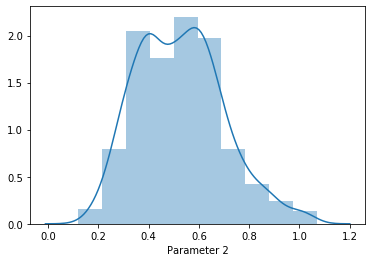

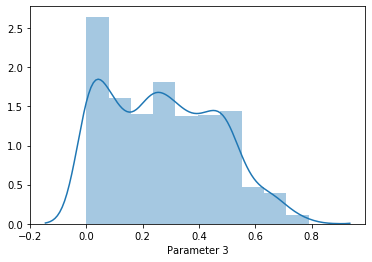

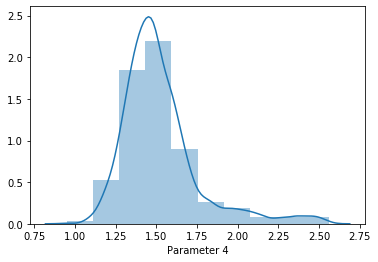

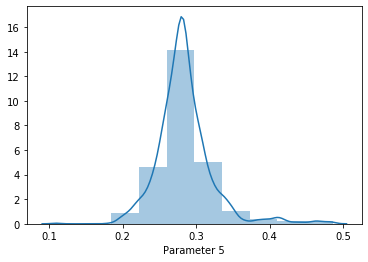

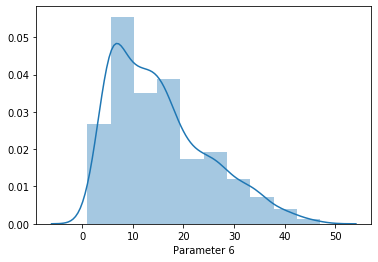

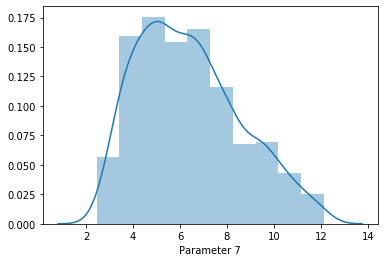

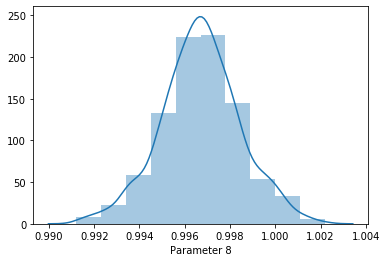

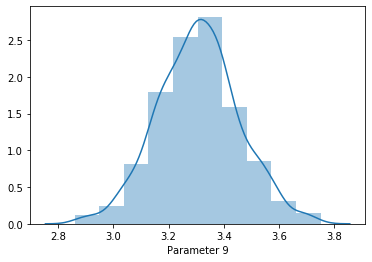

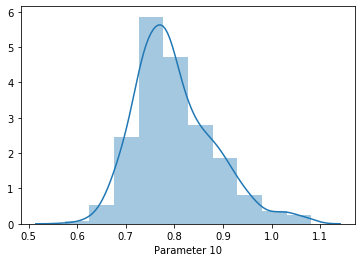

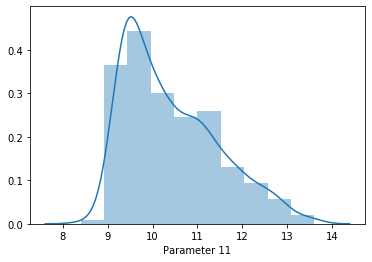

In [297]:
for i in signal_strength_copy.columns[:-1]:
  sns.distplot(signal_strength_copy[i], kde=True,bins=10 )
  plt.show()

In [343]:
signal_strength_copy.skew()

Parameter 1        0.701525
Parameter 2        0.408120
Parameter 3        0.287387
Parameter 4        0.702060
Parameter 5        0.014017
Parameter 6        0.790797
Parameter 7        0.506427
Parameter 8       -0.043270
Parameter 9        0.042044
Parameter 10       0.548173
Parameter 11       0.734342
Signal_Strength    0.400368
dtype: float64

In [344]:
#Split independent and dependent variables
X_var = signal_strength_copy.drop('Signal_Strength',axis=1)
Y_var = signal_strength_copy['Signal_Strength']

In [345]:
#Since the target class is unevenly distributed (Countplot above), we will oversample the data using SMOTE
from imblearn.over_sampling import  SMOTE
smote=SMOTE()
X_var,Y_var= smote.fit_resample(X_var,Y_var)
X_var=pd.DataFrame(X_var,columns=signal_strength_copy.columns[:-1])


In [346]:
#Check counts of classes after oversampling
Y_var=pd.Series(Y_var)
pd.value_counts(Y_var)

8.0    577
4.0    577
7.0    577
6.0    577
5.0    577
Name: Signal_Strength, dtype: int64

In [480]:
#Data scaling using StandardScaler to arrange the data distribution such that mean is near to 0 and standard deviation is near to 1
from sklearn.preprocessing import  StandardScaler
scale=StandardScaler()
scale.fit(X_var)

X_var=scale.transform(X_var)
X_var=pd.DataFrame(X_var,columns=signal_strength_copy.columns[:-1])

In [481]:
#Feature selection using Lasso regularization test , this method will shrink the coeffiecients of columns to zero if the column is not relevant for target prediction. Penalty method= 'L1' if lasso is used.
sel_ = SelectFromModel(LogisticRegression(C=1.0, solver ='liblinear',penalty='l1'))
sel_.fit(X_var,Y_var)

SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'))

In [482]:
#to get the support of function for target. If true, then the column is valid.
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [483]:
sel_.estimator_.coef_

array([[ 0.51016746,  0.59708195, -0.07905889,  0.04100339, -0.06317797,
        -0.00762864, -0.31290562,  0.15642261,  0.93072617, -1.20837537,
        -0.38352771],
       [-0.38301029, -0.01138251,  0.        ,  0.0120865 ,  0.30961933,
        -0.1140975 ,  0.51590568,  0.17210803, -0.19205058, -0.29849942,
        -0.99331483],
       [-0.13658633, -0.33379711, -0.3236099 , -0.06819814,  0.07071887,
         0.14691253, -0.05876568,  0.35009262, -0.03785947,  0.04028325,
        -0.04059642],
       [ 0.41665269, -1.03705738, -0.30072309,  0.09653927,  0.18380561,
         0.08715378, -0.14449583, -0.25533774,  0.22390458,  0.51923369,
         0.44321895],
       [-0.33421764,  0.28745852,  0.89768379, -0.25329124, -0.54273053,
         0.19908046, -0.57605667, -0.41726763, -0.42019466,  0.89420878,
         0.8508336 ]])

In [484]:
selected_feat = X_var.columns[(sel_.get_support())]
print('total features: {}'.format((X_var.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 11
selected features: 11
features with coefficients shrank to zero: 1


In [485]:
X_var.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
count,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03,2.885000e+03
mean,1.787902e-16,8.520048e-17,-1.992629e-16,-1.508518e-16,-5.945562e-16,1.336645e-16,2.315113e-16,-5.503012e-17,9.843849e-17,-1.274159e-16,7.873540e-17
std,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00,1.000173e+00
min,-2.277721e+00,-2.246242e+00,-1.503821e+00,-3.498038e+00,-3.043424e+00,-1.403776e+00,-1.656335e+00,-2.799928e+00,-3.047733e+00,-3.045793e+00,-2.149486e+00
25%,-7.349490e-01,-8.146030e-01,-9.346847e-01,-6.783146e-01,-5.596967e-01,-8.579104e-01,-8.492073e-01,-6.504613e-01,-6.604030e-01,-7.403625e-01,-8.915174e-01
50%,-1.795511e-01,-1.200268e-01,2.319325e-02,-4.321340e-02,2.938634e-03,-2.028713e-01,-2.033388e-01,3.135868e-02,-3.229582e-02,-2.096226e-02,-2.029245e-02
75%,6.226902e-01,6.529417e-01,7.840639e-01,4.670964e-01,5.366621e-01,4.521679e-01,6.572205e-01,6.330356e-01,6.228396e-01,7.421321e-01,8.020388e-01
max,2.905992e+00,3.009262e+00,2.583614e+00,3.724520e+00,3.566518e+00,3.072325e+00,3.009522e+00,3.151552e+00,3.046803e+00,2.893819e+00,2.343260e+00


In [353]:
#After scaling, we can see that all columns have mean near to 0 and standard deviation near to 1.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4E6A06E08>,
      dtype=object)

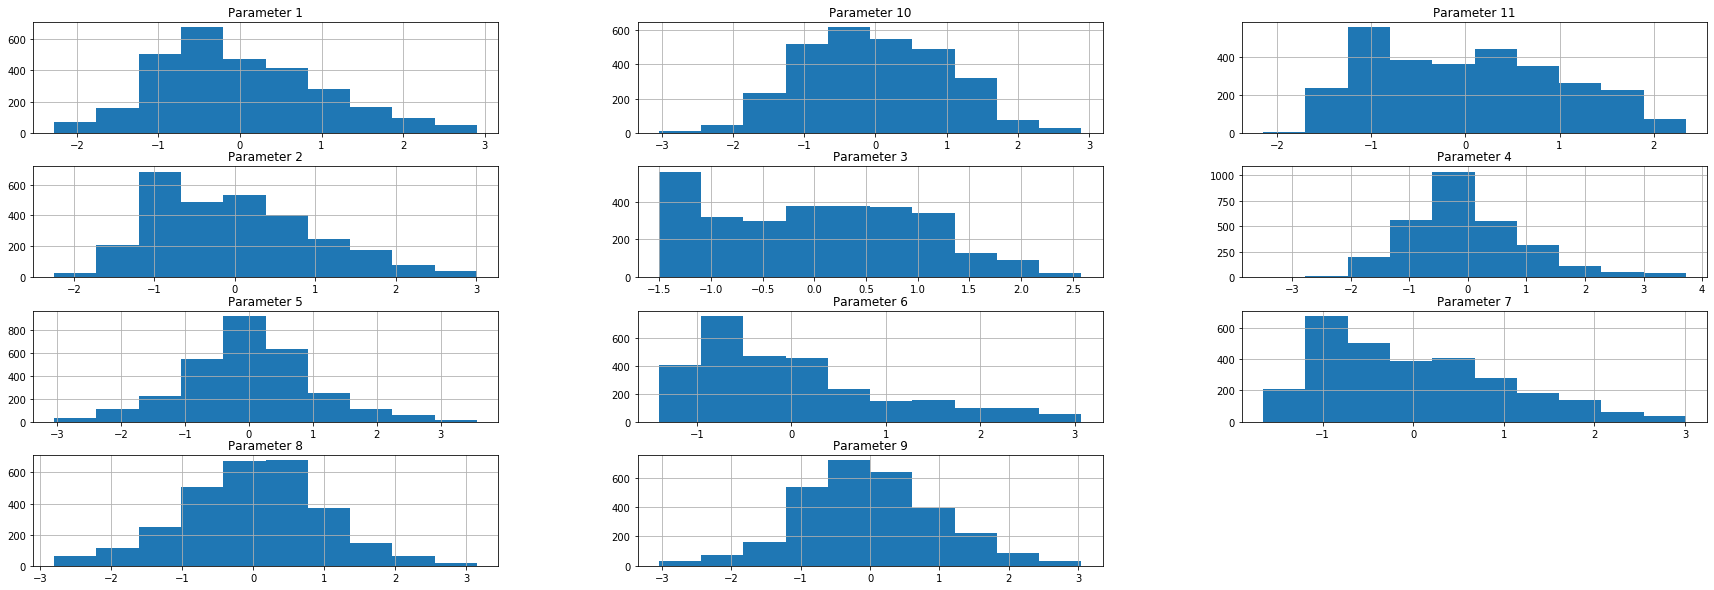

In [486]:
#Check distribution post scaling
X_var.hist(bins=10, figsize=(30,10))

In [493]:
#Split the dataset into train and test set in 70:30 ratio
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_var,Y_var,test_size=0.30)

In [494]:
pd.value_counts(Y_train)

5.0    426
6.0    417
4.0    401
8.0    390
7.0    385
Name: Signal_Strength, dtype: int64

In [495]:
#Transform the target column into binary value using one hot encoding 
Y_train=tensorflow.keras.utils.to_categorical(Y_train,num_classes=10)
Y_test=tensorflow.keras.utils.to_categorical(Y_test,num_classes=10)

In [496]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Neural Network Classifier

### Build and tune the model
##### Initialise a model with random set of hyperparameters like Lambda, Learning Rate, Number of neurons , Weight initialisation algorithm etc. and then try different set of parameters such that we get maximum accuracy.

In [497]:
#Build and tune the model
def train_test_model(inLambda,learningRate,inEpochs,X,Y):
    accuracy=0
    model_best=''
    wt_initializer=tensorflow.keras.initializers.GlorotUniform()
    #wt_initializer='he_uniform'
   # wt_initializer='he_normal'
   
   # wt_initializer=tensorflow.keras.initializers.GlorotNormal()
    
    do=0.7
    model=Sequential()
   # model.add(tensorflow.keras.Input(shape=(11)))

    model.add(Dense(256,input_shape=(11,),activation='relu',kernel_initializer=wt_initializer,kernel_regularizer=tensorflow.keras.regularizers.L2(inLambda)))
    model.add(BatchNormalization())
    model.add(Dropout(do))
    model.add(Dense(128,activation='relu',kernel_initializer=wt_initializer,kernel_regularizer=tensorflow.keras.regularizers.L2(inLambda)))
    model.add(BatchNormalization())
    model.add(Dropout(do))
    model.add(tensorflow.keras.layers.Dense(64,activation='relu',kernel_initializer=wt_initializer,kernel_regularizer=tensorflow.keras.regularizers.L2(inLambda)))
    model.add(BatchNormalization())
    model.add(Dropout(do))
    model.add(tensorflow.keras.layers.Dense(10,activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(inLambda)))
    #model.add(tensorflow.keras.Input(shape=(11)))
    adam=optimizers.Adam(learning_rate=learningRate)
    rmsprop=optimizers.RMSprop(learning_rate=learningRate,momentum=0.9)
    sgd=  optimizers.SGD(learning_rate=learningRate, decay=(learningRate/inEpochs), momentum=0.9)
    adagrad= optimizers.Adagrad(learning_rate=learningRate)
    # Compile model
    es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=500)
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

    # Fit the model
    model.fit(X, Y, epochs=inEpochs, batch_size=64, verbose=1,callbacks=[es])
    score = model.evaluate(X, Y, verbose= 1)
   
    return score,model

In [498]:
#Use different set of lambda and learning rate.
def tune_param(epochs):
    for i in range (1,6):
        lr = math.pow(10, np.random.uniform(-5.0, 0))
        Lambda = math.pow(10, np.random.uniform(-7,-2))
        best_acc,model_sgd = train_test_model( Lambda,lr, epochs,X_train,Y_train)
        print("try {0}/{1} Best_val_acc: {2}, lr: {3}, Lambda: {4}\n ".format(i,5 , best_acc, lr, Lambda))
       
        
    return  best_acc,model_sgd

In [499]:
best_acc,model_sgd=tune_param(100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 3.2834 - accuracy: 0.1941
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 1.5603 - accuracy: 0.3675
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4398 - accuracy: 0.3716
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3765 - accuracy: 0.4112
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3506 - accuracy: 0.4254
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3323 - accuracy: 0.4338
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 1.3038 - accuracy: 0.4552
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2674 - accuracy: 0.4393
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2652 - accuracy: 0.4368
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2326 - accuracy: 0.4645
Epoch 11/

In [500]:
#Compile and train the model with  Learning rate and lambda value providing best accuracy

best_score, model_class =  train_test_model(0.0003483158824711343 , 0.017460535373536094,500,X_train,Y_train)

Epoch 1/500
32/32 [==============================] - 1s 5ms/step - loss: 3.5607 - accuracy: 0.1429
Epoch 2/500
32/32 [==============================] - 0s 5ms/step - loss: 1.7975 - accuracy: 0.3778
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 1.6024 - accuracy: 0.3584
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 1.4799 - accuracy: 0.3903
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 1.4673 - accuracy: 0.3994
Epoch 6/500
32/32 [==============================] - 0s 6ms/step - loss: 1.3993 - accuracy: 0.4250
Epoch 7/500
32/32 [==============================] - 0s 6ms/step - loss: 1.3879 - accuracy: 0.4348
Epoch 8/500
32/32 [==============================] - 0s 7ms/step - loss: 1.3479 - accuracy: 0.4443
Epoch 9/500
32/32 [==============================] - 0s 7ms/step - loss: 1.3673 - accuracy: 0.4201
Epoch 10/500
32/32 [==============================] - 0s 5ms/step - loss: 1.3485 - accuracy: 0.4369
Epoch 11/

In [501]:
#Check for train and test accuracy
test_acc=model_class.evaluate(X_test,Y_test)
train_acc= model_class.evaluate(X_train,Y_train)
print("Training set Accuracy ", train_acc[1])
print("Test set accuracy", test_acc[1])

64/64 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.8296
Training set Accuracy  0.8296186327934265
Test set accuracy 0.7713626027107239


In [502]:
#We can fetch the weights initialised for each neuron at  every layer.
model_class.get_weights()

[array([[ 0.10268921,  0.15576659, -0.38756445, ..., -0.05845408,
         -0.03443914,  0.07607771],
        [-0.1722724 , -0.15620345,  0.10491204, ...,  0.04113019,
         -0.08921529, -0.24114458],
        [ 0.05309504,  0.22090118, -0.07748104, ..., -0.06594212,
          0.2289967 , -0.00808453],
        ...,
        [-0.20418948,  0.26248538, -0.28309333, ..., -0.44999275,
         -0.05325825,  0.36908734],
        [ 0.04932067, -0.526269  ,  0.15474746, ..., -0.09669749,
         -0.00394244,  0.07090645],
        [ 0.17118384, -0.12651166,  0.25718096, ..., -0.14847997,
          0.15760152, -0.25340116]], dtype=float32),
 array([-0.5567216 , -1.0407697 , -0.40538487, -0.6650815 , -0.3959215 ,
        -0.25451145, -0.50685966, -0.60181284, -0.37595323, -1.0240017 ,
         0.16686016, -1.6390625 , -0.5137618 , -0.42044353, -0.13809107,
        -0.75272065, -0.39444295, -0.34464455, -0.5815153 , -0.22164509,
        -0.65070117, -0.3311676 , -0.26762453, -0.7047447 , -0.706

In [503]:
#Summary of the model.
model_class.summary()

Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_628 (Dense)            (None, 256)               3072      
_________________________________________________________________
batch_normalization_438 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_438 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_629 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_439 (Bat (None, 128)               512       
_________________________________________________________________
dropout_439 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_630 (Dense)            (None, 64)             

In [504]:
#Prediction using the model above
predict = np.argmax(model_class.predict(X_test), axis=-1)
pd.value_counts(predict)

4    199
8    193
7    186
5    146
6    142
dtype: int64

### Pickle the model for future use

In [452]:
def save_model_class():
  
    with open("SignalStrength_Classifier.pkl", "wb") as file:
        pickle.dump(train_test_model, file)
        confirm_pickle_class = ttk.Entry(tkWind)
        confirm_pickle_class.grid(row=7,column=2)
        confirm_pickle_class.insert(1,str("Saved model to disk"))

## Neural Network Regressor

In [505]:
#Split dataset into independent and dependent variables
X_var_reg =signal_strength_copy.drop('Signal_Strength',axis=1)
Y_var_reg=  signal_strength_copy['Signal_Strength']

In [506]:
# We will balnace the counts of target classes using oversampling SMOTE method
smote_reg=SMOTE()
X_var_reg,Y_var_reg= smote_reg.fit_resample(X_var_reg,Y_var_reg)
X_var_reg=pd.DataFrame(X_var_reg,columns=signal_strength_copy.columns[:-1])

In [507]:
#For regression problem, we will scale the target column as well. After prediction is done, we will inverse transform the results.

#Convert target column to array and then reshape it to 2D matrix in order to feed it to scaling algorithm
Y_var_reg=np.array(Y_var_reg)
Y_var_reg=Y_var_reg.reshape(-1,1)

In [508]:
#Scaling data
scale=  StandardScaler()
scale.fit(X_var_reg)
X_var_reg=scale.transform(X_var_reg)
Y_var_reg=scale.fit_transform(Y_var_reg)

In [509]:
X_var_reg.shape

(2885, 11)

In [510]:
#All features
from sklearn.model_selection import  train_test_split
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg = train_test_split(X_var_reg,Y_var_reg,test_size=0.30)

In [511]:
#Build and tune regression model
def train_test_regression_model(inEpochs,lambdaVal,X,Y):

    wt_initializer=tensorflow.keras.initializers.GlorotUniform()
    #wt_initializer=tensorflow.keras.initializers.GlorotNormal()
   # wt_initializer=tensorflow.keras.initializers.HeNormal()
   # wt_initializer=tensorflow.keras.initializers.HeUniform()
    modelRegression=Sequential()
    #modelRegression.add(BatchNormalization(input_shape=(shape,),))
    modelRegression.add(tensorflow.keras.layers.Dense(256,input_shape=(11,),activation='relu',kernel_initializer=wt_initializer))
    modelRegression.add(BatchNormalization())
    modelRegression.add(Dropout(0.5))
    #modelRegression.add(tensorflow.keras.layers.Dense(256,activation='relu',kernel_initializer=wt_initializer))
    #modelRegression.add(BatchNormalization())
    #modelRegression.add(Dropout(0.5))
    modelRegression.add(tensorflow.keras.layers.Dense(128,activation='relu',kernel_initializer=wt_initializer))
    modelRegression.add(BatchNormalization())
    modelRegression.add(Dropout(0.5))
   # modelRegression.add(tensorflow.keras.layers.Dense(128,activation='relu',kernel_initializer=wt_initializer))
    #modelRegression.add(BatchNormalization())
    #modelRegression.add(Dropout(0.5))
    modelRegression.add(tensorflow.keras.layers.Dense(64,activation='relu',kernel_initializer=wt_initializer))
    modelRegression.add(tensorflow.keras.layers.Dense(1,activation='linear',kernel_regularizer=tensorflow.keras.regularizers.L2(lambdaVal)))
   # model.add(tensorflow.keras.Input(shape=(11)))
   
    #sgd = optimizers.SGD(lr=learningRate, decay=1e-4, momentum=0.9)
    # Compile model
    modelRegression.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

    # Fit the model
    modelRegression.fit(X, Y, epochs=inEpochs,  batch_size=100, verbose= 1)
    scoreRegression = modelRegression.evaluate(X, Y, verbose=1)
    
    return scoreRegression,modelRegression

In [518]:
#Complie and train the model

def tune_regress_model(epochs):
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_reg,model_reg = train_test_regression_model(epochs,Lambda, X_var_reg,Y_var_reg)
    print("try {0}/{1} Best_val_acc: {2}, Lambda: {3}\n ".format(1,1, best_reg,Lambda))
     


In [519]:
best_reg,model_reg = tune_regress_model(200)

Epoch 1/200
29/29 [==============================] - 1s 5ms/step - loss: 1.4944 - mean_squared_error: 1.4936
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 0.7876 - mean_squared_error: 0.7869
Epoch 3/200
29/29 [==============================] - 0s 6ms/step - loss: 0.6088 - mean_squared_error: 0.6082
Epoch 4/200
29/29 [==============================] - 0s 7ms/step - loss: 0.5585 - mean_squared_error: 0.5579
Epoch 5/200
29/29 [==============================] - 0s 6ms/step - loss: 0.5108 - mean_squared_error: 0.5102
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 0.4654 - mean_squared_error: 0.4650
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.4554 - mean_squared_error: 0.4550
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 0.4184 - mean_squared_error: 0.4179
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 0.4080 - mean_squared_error: 0.4076
Epoch 10/200
29/29 

TypeError: cannot unpack non-iterable NoneType object

In [520]:
#Get the MSE. Lesser the MSE , better the predicting model
test_acc_reg=model_reg.evaluate(X_test_reg,Y_test_reg)
train_acc_reg= model_reg.evaluate(X_train_reg,Y_train_reg)
print("Training set MSE ", train_acc_reg[1])
print("Test set MSE", test_acc_reg[1])

64/64 [==============================] - 0s 2ms/step - loss: 0.0653 - mean_squared_error: 0.0653
Training set MSE  0.06527809053659439
Test set MSE 0.054600849747657776


In [525]:
model_reg.weights

[<tf.Variable 'dense_632/kernel:0' shape=(11, 256) dtype=float32, numpy=
 array([[ 0.1810421 , -0.07740901,  0.05568597, ..., -0.1009313 ,
         -0.29819927, -0.05109629],
        [-0.06508048,  0.10842165, -0.08416885, ..., -0.10442735,
         -0.06807828,  0.01216791],
        [-0.05411005,  0.22245096, -0.01803035, ..., -0.00058661,
         -0.0521033 ,  0.09170974],
        ...,
        [ 0.1540144 ,  0.14135632, -0.15460195, ...,  0.1012952 ,
         -0.02792051,  0.04529087],
        [-0.13523659, -0.01123421,  0.03351001, ..., -0.11335947,
         -0.10212633, -0.00182022],
        [ 0.01698901, -0.17650317,  0.05029099, ..., -0.0252356 ,
         -0.02249398, -0.24736422]], dtype=float32)>,
 <tf.Variable 'dense_632/bias:0' shape=(256,) dtype=float32, numpy=
 array([-0.09839349, -0.18636906, -0.31295514, -0.16037957, -0.18327384,
        -0.05583202, -0.01095843, -0.11243137,  0.02511281, -0.06885139,
        -0.22932717, -0.14902672, -0.13108516, -0.07428963, -0.1467598

In [527]:
model_reg.summary()

Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_632 (Dense)            (None, 256)               3072      
_________________________________________________________________
batch_normalization_441 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_441 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_633 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_442 (Bat (None, 128)               512       
_________________________________________________________________
dropout_442 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_634 (Dense)            (None, 64)             

In [521]:
#Prediction using above model
pred_reg= model_reg.predict(X_test_reg)
pred_reg

array([[ 8.62007380e-01],
       [ 1.52029121e+00],
       [ 2.99885720e-01],
       [-7.87120163e-01],
       [-8.10621679e-01],
       [-1.26040900e+00],
       [ 1.56291282e+00],
       [-1.37201142e+00],
       [-8.69159102e-01],
       [ 7.14611784e-02],
       [ 5.92731953e-01],
       [-1.42235804e+00],
       [ 8.26976895e-01],
       [-1.27470362e+00],
       [-1.44185746e+00],
       [-1.19021618e+00],
       [ 5.97970366e-01],
       [ 1.11697340e+00],
       [ 5.38177848e-01],
       [ 2.18139421e-02],
       [ 1.40446103e+00],
       [-1.47170377e+00],
       [-1.20873296e+00],
       [ 7.15804935e-01],
       [-1.01415312e+00],
       [-1.32446969e+00],
       [ 5.35824001e-01],
       [-5.94101667e-01],
       [ 1.51000297e+00],
       [ 9.40626144e-01],
       [ 1.42098165e+00],
       [ 1.56738508e+00],
       [-1.23103881e+00],
       [-1.51262748e+00],
       [-1.54971051e+00],
       [ 8.70645225e-01],
       [ 2.43283242e-01],
       [-5.37968993e-01],
       [-8.8

In [522]:
#Inverse transform the predictions
pred_reg_inv =scale.inverse_transform(pred_reg)

In [523]:
pred_reg_inv

array([[7.219063 ],
       [8.150017 ],
       [6.4241023],
       [4.886844 ],
       [4.8536077],
       [4.2175126],
       [8.210293 ],
       [4.059683 ],
       [4.7708235],
       [6.1010613],
       [6.8382497],
       [3.988482 ],
       [7.169522 ],
       [4.197297 ],
       [3.9609056],
       [4.31678  ],
       [6.845658 ],
       [7.579639 ],
       [6.7610984],
       [6.0308495],
       [7.986208 ],
       [3.9186966],
       [4.2905936],
       [7.012301 ],
       [4.565771 ],
       [4.126917 ],
       [6.7577696],
       [5.1598134],
       [8.135467 ],
       [7.330246 ],
       [8.009571 ],
       [8.216618 ],
       [4.2590485],
       [3.8608217],
       [3.8083785],
       [7.2312784],
       [6.344054 ],
       [5.239197 ],
       [4.755197 ],
       [8.162548 ],
       [8.219952 ],
       [5.4934936],
       [4.011488 ],
       [4.06488  ],
       [6.592295 ],
       [8.225605 ],
       [6.7934675],
       [8.496319 ],
       [3.8597238],
       [8.239546 ],


### Pickle the model for future use.

In [448]:
def save_model_regress():
  
    with open("SignalStrength_Regressor.pkl", "wb") as file:
        pickle.dump(train_test_regression_model, file)
        confirm_pickle_regress = ttk.Entry(tkWind)
        confirm_pickle_regress.grid(row=4,column=2)
        confirm_pickle_regress.insert(1,str("Saved model to disk"))

## Clickable GUI to automate the classifier and regressor model created above

In [473]:
from tkinter import ttk


tkWind = tk.Tk()
tkWind.title('Neural Networks GUI-Great Learning')


#Step 1 :Import Data label, button and confirmation
fileNamelbl = ttk.Label(tkWind,text='Step 1: File Name')
fileNamelbl.grid(row=0, column=0,sticky=tk.W)
name_var=tk.StringVar()
name_entry =ttk.Entry(tkWind,textvariable=name_var)
name_entry.grid(row=0, column=1)
#df = pd.DataFrame()
def import_data():
    df_name= name_var.get()
    df=pd.read_csv(df_name)

    confirm='Done'
    confirm_label = ttk.Entry(tkWind)
    confirm_label.grid(row=0,column=3)
    confirm_label.insert(1,str(confirm))
    return df


importButton =ttk.Button(tkWind,text='Import data', command=import_data)
importButton.grid(row=0,column=2)
def import_data_return():
    df_name= name_var.get()
    df_signal=pd.read_csv(df_name)
    return df_signal


#Step 2 :Target Column 
targetLabel = ttk.Label(tkWind,text='Step 2: Target Column')
targetLabel.grid(row=1, column=0,sticky=tk.W)

target_name_var=tk.StringVar()
targetname_entry =ttk.Entry(tkWind,textvariable=target_name_var)
targetname_entry.grid(row=1, column=1)

def search_target():
    df_name= name_var.get()
    target_name=target_name_var.get()
    df= import_data_return()
    status=''
    df_columns= df.columns
    #print(df_columns)
    if target_name in df_columns:
        status='Found'
    else:
        status='Not found'
        
    confirm_target = ttk.Entry(tkWind)
    confirm_target.grid(row=1,column=3)
    confirm_target.insert(1,str(status))
    
    
importTarget =ttk.Button(tkWind,text='Import Target', command=search_target)
importTarget.grid(row=1,column=2)


#Step 3: Neural Network regressor
def tune_reg_model(epochs):
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_reg,model_reg = train_test_regression_model(epochs,Lambda, X_var_reg,Y_var_reg)
     #print("try {0}/{1} Best_val_acc: {2}, Lambda: {3}\n ".format(1,200, best_reg,Lambda))
    
    
    
    
NN_regress_Label = ttk.Label(tkWind,text='Step 3: Neural Network Regressor')
NN_regress_Label.grid(row=2, column=0,sticky=tk.W)


NN_regression_Label = ttk.Label(tkWind,text='Regression')
NN_regression_Label.grid(row=3, column=0)
NN_regression_train =ttk.Button(tkWind,text='Train', command=tune_reg_model(200))
NN_regression_train.grid(row=3,column=1)
class_confirm  = ttk.Label(tkWind,text='Network Trained')
class_confirm.grid(row=3,column=2)

NN_regression_pickle = ttk.Label(tkWind,text='Pickle')
NN_regression_pickle.grid(row=4, column=0)
NN_regression_pickle_run =ttk.Button(tkWind,text='Run',command=save_model_regress)
NN_regression_pickle_run.grid(row=4,column=1)


#Step 4: Neural Network Classifier
def tune_classification_model(epochs):
    lambdaVal = 0.0003483158824711343
    lr=  0.017460535373536094
    accuracy,model =train_test_model(lambdaVal ,lr,epochs,X_train,Y_train)
   
    
NN_classifier_Label = ttk.Label(tkWind,text='Step 4: Neural Network Classifier')
NN_classifier_Label.grid(row=5, column=0,sticky=tk.W)


NN_classifier_lab = ttk.Label(tkWind,text='Classifier')
NN_classifier_lab.grid(row=6, column=0)
NN_classifier_train =ttk.Button(tkWind,text='Train', command=tune_classification_model(200))
NN_classifier_train.grid(row=6,column=1)
class_confirm  = ttk.Label(tkWind,text='Network Trained')
class_confirm.grid(row=6,column=2)
   
NN_classifier_pickle = ttk.Label(tkWind,text='Pickle')
NN_classifier_pickle.grid(row=7, column=0)
NN_classifier_pkl_run =ttk.Button(tkWind,text='Run',command=save_model_class)
NN_classifier_pkl_run.grid(row=7,column=1)

tkWind.mainloop()

Epoch 1/200
29/29 [==============================] - 1s 5ms/step - loss: 1.8759 - mean_squared_error: 1.8758
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 0.9011 - mean_squared_error: 0.9011
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 0.7055 - mean_squared_error: 0.7054
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5933 - mean_squared_error: 0.5932
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 0.6220 - mean_squared_error: 0.6219
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5333 - mean_squared_error: 0.5333
Epoch 7/200
29/29 [==============================] - 0s 5ms/step - loss: 0.4784 - mean_squared_error: 0.4784
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 0.4572 - mean_squared_error: 0.4572
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 0.4507 - mean_squared_error: 0.4506
Epoch 10/200
29/29 

### Observations/Conclusion:
#### 1.Classification:
We have categories into which we can classify signal strengths.
We have used ReLu as activation function for hidden layers and softmax for output layer since we have multiple classes.
Also,We have used cross entropy as loss function and accuracy to measure the performance of the model.
The accuracy is 82.67% for training set and about 77% for test set.

#### 2. Regression:
The result is continous values that revolve around the classes value (for e.g. 7.21313) on the same dataset rather than discrete values of  classes.
For the model to behave as regressor model, we have used ReLu in hidden layers but at the output layer we have linear activation function.
We have used mean squared error as the loss function as well as to measure the performance of the model.
The MSE is 6.5 % for training set and 5.4 % for test set.

Thus on the same set of data , we were able to build classifier and regressor model using Neural network.


#### 3. By the exercise above, we were able to  build an ANN model by adding layers and using activation layers like Relu, Softmax and linear. We were able to train and compile it using various optimization algorithm like SGD and Adam. During training ,we faced overfitting problem but it was reduced using methods like adding regularization and DropOut layers. 